In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sns.set_style('darkgrid')

In [14]:
df=pd.read_csv('C:\\Users\\Windows\\_ANCONDA WORKSHOP\\datasets\\titanic_train_and_test.csv')

In [16]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [17]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [20]:
df.drop(['zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14'],inplace=True,axis=1)

In [21]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Pclass', 'zero.15',
       'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived'],
      dtype='object')

In [22]:
df.drop(['zero.15','zero.16','zero.17','zero.18'],inplace=True,axis=1)

In [23]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Pclass', 'Embarked',
       '2urvived'],
      dtype='object')

In [24]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,3,2.0,0
1,2,38.0,71.2833,1,1,1,0.0,1
2,3,26.0,7.9250,1,0,3,2.0,1
3,4,35.0,53.1000,1,1,1,2.0,1
4,5,35.0,8.0500,0,0,3,2.0,0


In [125]:
dff=df.rename(columns={'2urvived':'survived'})

In [126]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
Pclass         1309 non-null int64
Embarked       1307 non-null float64
survived       1309 non-null int64
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [127]:
dff.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Pclass         0
Embarked       2
survived       0
dtype: int64

In [109]:
df.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [128]:
dff.dropna(inplace=True)

In [129]:
dff.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Pclass         0
Embarked       0
survived       0
dtype: int64

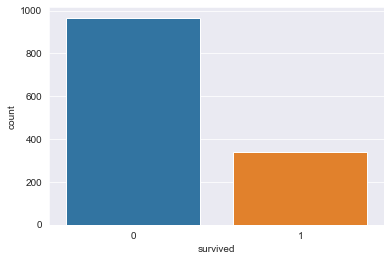

In [54]:
sns.countplot('survived',data=dff)

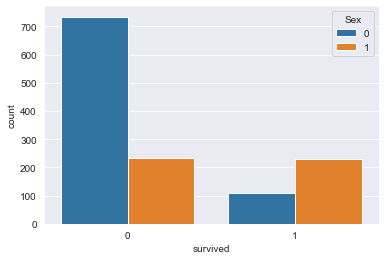

In [55]:
sns.countplot(x='survived',data=dff,hue='Sex')

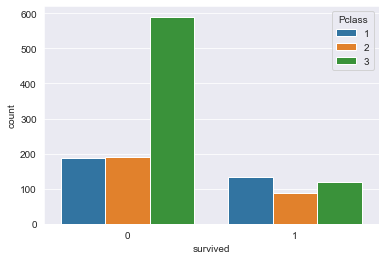

In [56]:
sns.countplot('survived',data=dff,hue='Pclass')

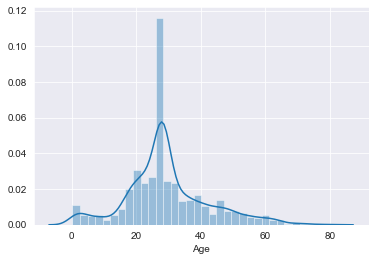

In [58]:
sns.distplot(dff['Age'])

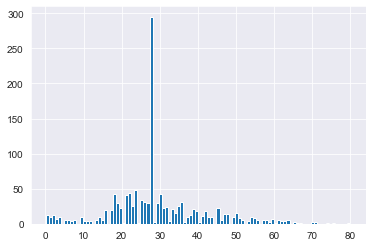

In [61]:
dff['Age'].hist(bins=100)

the above plot gives count on y axis but, using seaborn it gives in %

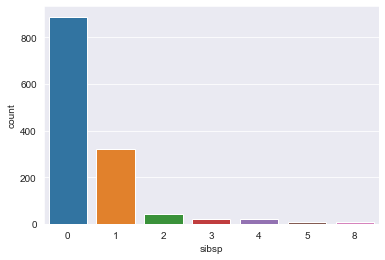

In [62]:
sns.countplot(x='sibsp',data=dff)

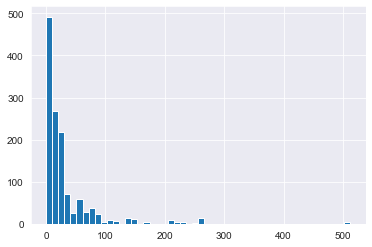

In [64]:

dff.Fare.hist(bins=50)

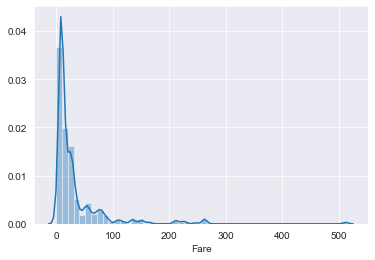

In [71]:
sns.distplot(dff['Fare'],bins=50)

In [72]:
import cufflinks as cf
cf.go_offline()

In [75]:
dff.Fare.iplot(kind='hist',bins=50)

In [92]:
dff.iplot(kind='box',theme='solar',x='Pclass',y='Age',rangeslider=True)

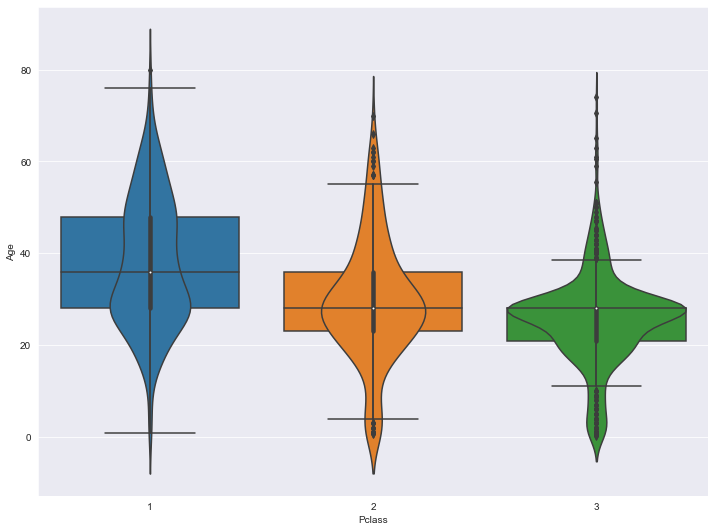

In [99]:
plt.figure(figsize=(12,9))
sns.violinplot(x='Pclass',y='Age',data=dff)
sns.boxplot(x='Pclass',y='Age',data=dff)

In [100]:
def impute_age(cols):
    Age =cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 28
    else:
        return Age
    

In [112]:
dff['Age']=dff[['Age','Pclass']].apply(impute_age,axis=1)

##### there was a cabin coloumn which was already dropped
becoz it was having so many null values

In [118]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [131]:
dff['1.0 2.0'.split()]=embark

In [133]:
dff.head(1)

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,survived,1.0,2.0
0,1,22.0,7.25,0,1,3,2.0,0,0,1


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X=dff.drop('survived',axis=1)
y=dff.survived

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [167]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='newton-cg')

In [168]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
pred=log.predict(X_test)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[268  49]
 [ 19  57]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       317
           1       0.54      0.75      0.63        76

    accuracy                           0.83       393
   macro avg       0.74      0.80      0.76       393
weighted avg       0.86      0.83      0.84       393



In [ ]:
optimization algorithms 'newton-cg', 'sag', 'saga' and  'liblinear'

In [ ]:
'newton-cg'
[[268  49]
 [ 19  57]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       317
           1       0.54      0.75      0.63        76

    accuracy                           0.83       393
   macro avg       0.74      0.80      0.76       393
weighted avg       0.86      0.83      0.84       393

In [ ]:
'liblinear'

[[272  50]
 [ 15  56]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       322
           1       0.53      0.79      0.63        71

    accuracy                           0.83       393
   macro avg       0.74      0.82      0.76       393
weighted avg       0.87      0.83      0.85       393

In [ ]:
'lbfgs'

[[276  44]
 [ 13  60]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       320
           1       0.58      0.82      0.68        73

    accuracy                           0.85       393
   macro avg       0.77      0.84      0.79       393
weighted avg       0.88      0.85      0.86       393

In [ ]:
'saga'
[[277  91]
 [ 10  15]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       368
           1       0.14      0.60      0.23        25

    accuracy                           0.74       393
   macro avg       0.55      0.68      0.54       393
weighted avg       0.91      0.74      0.81       393


In [ ]:
'sag'
[[278  91]
 [  9  15]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       369
           1       0.14      0.62      0.23        24

    accuracy                           0.75       393
   macro avg       0.56      0.69      0.54       393
weighted avg       0.92      0.75      0.81       393